<a href="https://colab.research.google.com/github/DSF-Kotaro/blog/blob/main/%E3%82%84%E3%81%95%E3%81%97%E3%81%8F%E5%AD%A6%E3%81%B6%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%E3%81%AB%E5%BF%85%E8%A6%81%E3%81%AA%E7%B5%B1%E8%A8%88%E3%81%AE%E6%95%99%E7%A7%91%E6%9B%B8_001%2C002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
sample_df = pd.read_csv('2.csv' , sep=',')

In [3]:
sample_df

,sample,sex,age,minutes
0,1,F,55,55
1,2,M,34,24
2,3,F,22,240
3,4,F,53,99
4,5,M,53,154
...,...,...,...,...
155,156,F,13,211
156,157,F,39,155
157,158,F,70,120
158,159,F,78,46


**操作2-1　分布の上限と下限を確認する。**

In [4]:
a = sample_df['minutes'].max()
b = sample_df['minutes'].min()
print('max is {0}, min is {1}'.format(a,b))

max is 287, min is 10


***操作2-2　階級数の幅を求める***

In [5]:
a = round(a,-2)
b = round(b,-2)

print('a is {0}, b is {1}'.format(a,b) )

a is 300, b is 0


In [6]:
number_division = 10
number_class =int(round((a-b)/number_division,0))
print(' number of class is {0}'.format(number_class))

 number of class is 30


In [7]:
min_columns = np.array(list(range(b,a,number_class)))
max_columns = min_columns + number_class

In [8]:
min_columns = min_columns.reshape(-1,1)
max_columns = max_columns.reshape(-1,1)
class_frame = np.append(min_columns,max_columns,axis=1)

In [9]:
class_df = pd.DataFrame(data=class_frame,columns=['min','max'])
class_df['people'] = 0

In [10]:
class_df

,min,max,people
0,0,30,0
1,30,60,0
2,60,90,0
3,90,120,0
4,120,150,0
5,150,180,0
6,180,210,0
7,210,240,0
8,240,270,0
9,270,300,0


In [11]:
len(class_df)

10

In [12]:
def sep_class(i,min_value, max_value):
  class_df.loc[i]['people']=((sample_df['minutes'] >= min_value) & (sample_df['minutes'] < max_value)).sum()
  return

In [13]:
for i in range(len(class_df)):
  min_value = class_df.loc[i]['min']
  max_value = class_df.loc[i]['max']

  sep_class(i, min_value,max_value) 

In [14]:
class_df

,min,max,people
0,0,30,14
1,30,60,20
2,60,90,22
3,90,120,25
4,120,150,33
5,150,180,18
6,180,210,17
7,210,240,7
8,240,270,3
9,270,300,1


In [15]:
class_df['people'].sum()

160

In [16]:
hist_minutes = sample_df['minutes'].values

In [17]:
hist_minutes

array([ 55,  24, 240,  99, 154,  98, 174, 203,  49,  78,  24, 184, 207,
       126,  81, 124, 215, 146,  46,  55,  46,  12,  73, 103,  85, 167,
        24, 154,  93, 136, 234, 213, 254, 149,  20, 224, 140,  31,  96,
        20,  14, 147, 157, 155, 187, 147,  51,  63, 149, 127, 187,  46,
       112, 198,  28,  97,  67, 106,  24, 104,  35, 154,  98, 120,  11,
       106, 141,  93, 116,  77,  90, 183, 163, 184,  70, 123,  56, 120,
        72,  99, 141,  59, 287, 103, 202, 207, 129, 206, 147,  87, 158,
        77,  40,  80, 174, 222, 222,  59,  20, 110, 110, 120, 107,  63,
        76,  12, 130, 194,  10, 169,  64, 185,  90, 166, 100,  69, 187,
        86, 100, 115, 152,  92, 177, 187, 149, 151,  62,  81, 121, 183,
       110, 194,  32, 131,  32, 144,  49, 124,  34,  20, 128,  83,  72,
       145, 161, 247,  30, 156, 143, 122, 129,  30,  69, 134, 148, 211,
       155, 120,  46, 146])

(array([14., 20., 22., 25., 33., 18., 17.,  7.,  3.,  1.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <a list of 10 Patch objects>)

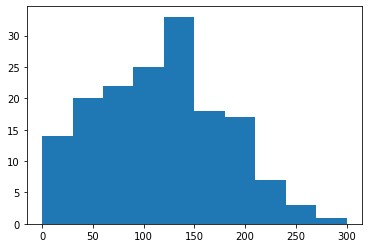

In [18]:
plt.hist(hist_minutes, bins=number_division, range = (b,a))